In [4]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.classical import expr   # allows classical logic on mid circuit measurement

In [5]:
def get_ghz_circ_static(num_qubit):
    if num_qubit%2==1:                                                     #odd no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-1)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-1):
            qc.cx(i,i+1)
            qc.cx(num_qubit-i-1,num_qubit-i-2)
        

    else:                                                                    #even no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-2)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-2):
            qc.cx(i,i+1)
            qc.cx(num_qubit-1-i-1,num_qubit-i-3)
        qc.cx(num_qubit-2,num_qubit-1)
    for i in range(num_qubit):
        qc.measure(qr[i],cr2[i])
    return qc

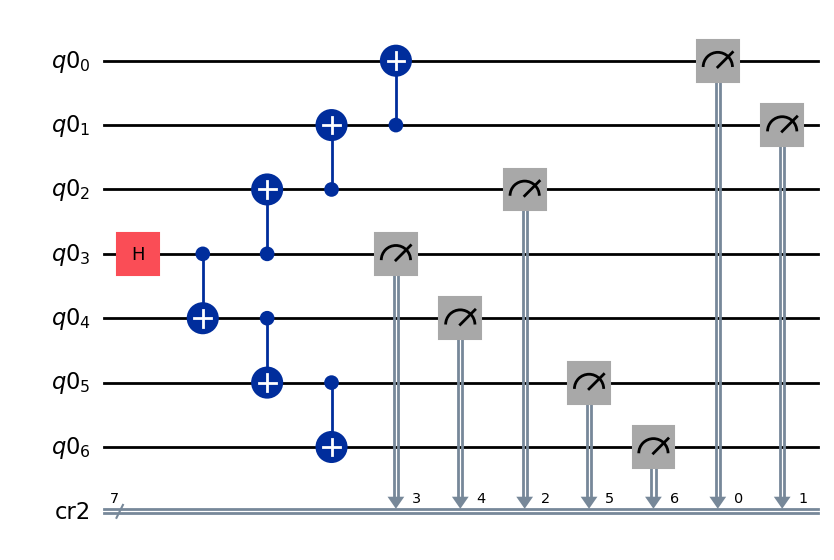

In [3]:
qc = get_ghz_circ_static(num_qubit=7)
qc.draw("mpl")

In [6]:
def get_ghz_circ_dynamic_1(num_qubit):   
    if num_qubit%2==1:                                                  # For odd number of qubits
        qr=QuantumRegister(num_qubit)
        num_mid_measurements=int(num_qubit/2)
        cr1=ClassicalRegister(num_mid_measurements,name="cr1")          # mid circuit measurement
        cr2=ClassicalRegister(num_qubit,name="cr2")                     # final measurement
        qc=QuantumCircuit(qr,cr1,cr2)
        for i in range(num_mid_measurements+1):
            qc.h(2*i)
        qc.barrier()
        for i in range(num_mid_measurements):
            qc.cx(2*i+2,2*i+1)
            qc.cx(2*i,2*i+1)
        qc.barrier()
        for i in range(num_mid_measurements):
            qc.measure(2*i+1,cr1[i])
            if i==0:
                parity=expr.lift(cr1[i])
            else :
                parity=expr.bit_xor(cr1[i],parity)
            with qc.if_test(parity):
                    qc.x(2*i+2)
    
        for i in range(num_mid_measurements):
            parity=expr.lift(cr1[i])
            with qc.if_test(parity):
                qc.x(2*i+1)
            qc.cx(2*i,2*i+1)

    else:                                                               # For even number of Qubits
        qr=QuantumRegister(num_qubit)
        num_mid_measurements=int((num_qubit-1)/2)
        cr1=ClassicalRegister(num_mid_measurements,name="cr1")          # mid circuit measurement
        cr2=ClassicalRegister(num_qubit,name="cr2")                     # final measurement
        qc=QuantumCircuit(qr,cr1,cr2)
        for i in range(num_mid_measurements+1):
            qc.h(2*i)
        
        for i in range(num_mid_measurements):
            qc.cx(2*i+2,2*i+1)
            qc.cx(2*i,2*i+1)
        
        for i in range(num_mid_measurements):
            qc.measure(2*i+1,cr1[i])
            if i==0:
                parity=expr.lift(cr1[i])
            else :
                parity=expr.bit_xor(cr1[i],parity)
            with qc.if_test(parity):
                    qc.x(2*i+2)
    
        for i in range(num_mid_measurements):
            parity=expr.lift(cr1[i])
            with qc.if_test(parity):
                qc.x(2*i+1)
            qc.cx(2*i,2*i+1)
        qc.cx(num_qubit-2,num_qubit-1)
    for i in range(num_qubit):
        qc.measure(qr[i],cr2[i])
    return qc

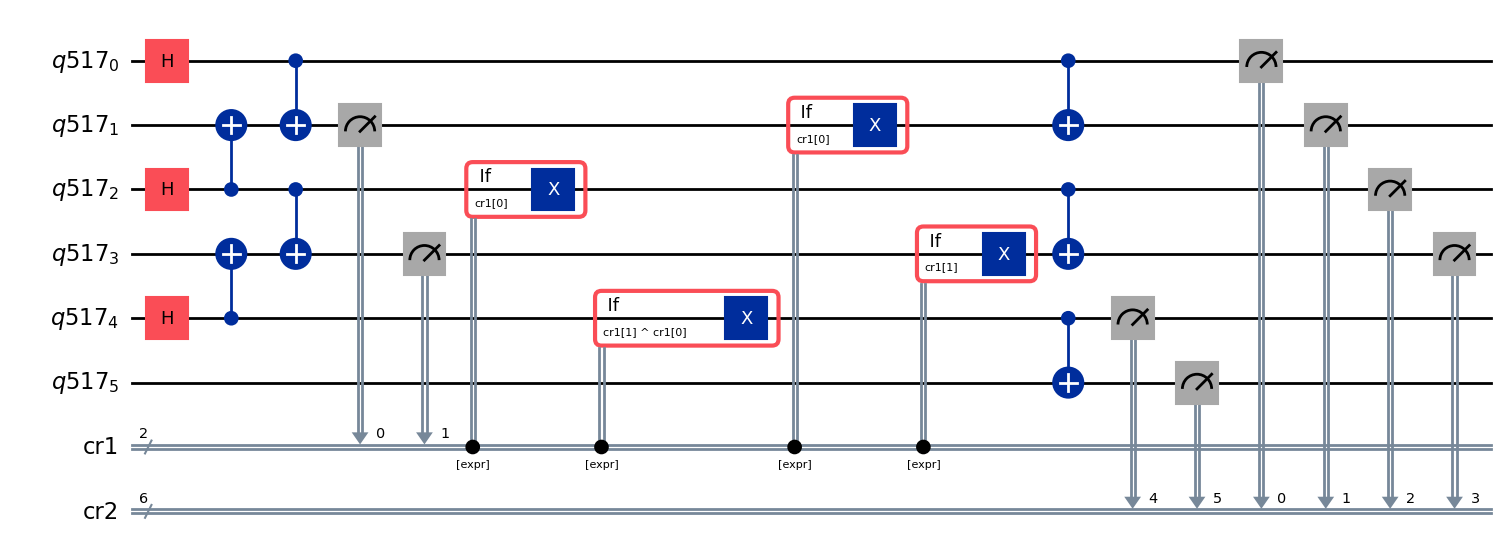

In [17]:
qc = get_ghz_circ_dynamic_1(num_qubit=6)
qc.draw("mpl")

In [7]:
def get_ghz_circ_static_dd(num_qubit):
    if num_qubit%2==1:                                                     #odd no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-1)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-1):
            qc.cx(i,i+1)
            qc.cx(num_qubit-i-1,num_qubit-i-2)
        

    else:                                                                    #even no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-2)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-2):
            qc.cx(i,i+1)
            qc.cx(num_qubit-1-i-1,num_qubit-i-3)
        qc.cx(num_qubit-2,num_qubit-1)
    for i in range(num_qubit):
        qc.measure(qr[i],cr2[i])
    return qc

In [6]:
#dynamic circuit using qubit-reuse in aersimulator

In [7]:
"""def get_ghz_circ_static_1(num_qubit):
    if num_qubit%2==1:                                                     #odd no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-1)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-1):
            qc.cx(i,i+1)
            qc.cx(num_qubit-i-1,num_qubit-i-2)
        

    else:                                                                    #even no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-2)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-2):
            qc.cx(i,i+1)
            qc.cx(num_qubit-1-i-1,num_qubit-i-3)
        qc.cx(num_qubit-2,num_qubit-1)
    for i in range(num_qubit):
        qc.measure(qr[i],cr2[i])
    return qc
"""

In [8]:
"""#creating dynamic circuit from a separate static circuit
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

def get_ghz_circ_dynamic_2(num_qubit):
    qc=get_ghz_circ_static_1(num_qubit)
    aer_sim = AerSimulator()
    pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1, init_method="qubit_reuse")
    transpiled_qc = pm.run(qc)
    return transpiled_qc
"""

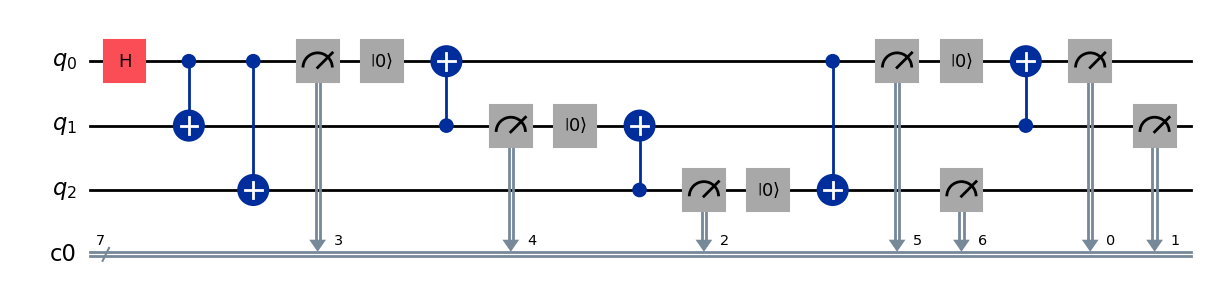

In [9]:
"""qc = get_ghz_circ_dynamic_2(num_qubit=7)
qc.draw("mpl")
"""

In [8]:
#Creating list of circuits[Static_1, Dynamic1_1, Dynamic2_1, Static_1, Dynamic1_1, Dynamic2_1,...,Static_2, Dynamic1_2, Dynamic2_2, Static_2, Dynamic1_2, Dynamic2_2,...] i.e. some copies of each of them

min_qubit=14
max_num_qubit=21
copies=3

#qc_list_dynamic_1=[]
#qc_list_dynamic_2=[]
#qc_list_static=[]
#observables=[]

qc_list=[]
qc_list_2=[]
num_qubit_list=list(range(min_qubit,max_num_qubit+1))
for num_qubit in num_qubit_list:
    for i in range(copies):
        qc_list.append(get_ghz_circ_static(num_qubit))
        qc_list.append(get_ghz_circ_dynamic_1(num_qubit))
        qc_list_2.append(get_ghz_circ_static_dd(num_qubit))
print(num_qubit_list)

[14, 15, 16, 17, 18, 19, 20, 21]


In [9]:
#Ideal Simulation with AerSimulator
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler
 
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)


qc_transpiled_list_ideal = pm.run(qc_list)
qc_transpiled_list_ideal_static_dd = pm.run(qc_list_2)

In [10]:
sampler = Sampler(backend=aer_sim)
result_ideal = sampler.run(qc_transpiled_list_ideal).result()
result_ideal_static_dd = sampler.run(qc_transpiled_list_ideal_static_dd).result()

In [11]:
print(result_ideal)
len(result_ideal)
print(result_ideal_static_dd)
len(result_ideal_static_dd)

PrimitiveResult([PubResult(data=DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))), PubResult(data=DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=6>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))), PubResult(data=DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))), PubResult(data=DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=6>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))), PubResult(data=DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))), PubResult(data=DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=6>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))), PubResult(data=DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=15>))), PubResult(data=DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=7>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=15>))), PubResult(data=DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=15>))), PubResult(data=DataBin<>(cr1=

24

In [12]:
# For getting list of ideal counts (argument required for Fidelity)
counts_list_ideal=[]
counts_list_ideal_static_dd=[]

for i in range(len(num_qubit_list)):  
    for j in range(copies):
        data_static = result_ideal[(2*i*copies)+(2*j)].data    
        data_dynamic_1 = result_ideal[(2*i*copies)+((2*j)+1)].data 
        data_static_dd = result_ideal_static_dd[(i*copies)+(j)].data    

        print(data_static)
        print(data_static_dd)
        print(data_dynamic_1)
       
        
        counts_static=data_static.cr2.get_counts()
        counts_dynamic_1=data_dynamic_1.cr2.get_counts()
        counts_static_dd=data_static_dd.cr2.get_counts()
        
        counts_list_ideal.append(counts_static)
        counts_list_ideal.append(counts_dynamic_1)
        counts_list_ideal_static_dd.append(counts_static_dd)
        

DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))
DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))
DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=6>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))
DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))
DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))
DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=6>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))
DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))
DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))
DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=6>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))
DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=15>))
DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=15>))
DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=7>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=15>))
Data

In [16]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService




backend_name = "ibm_brisbane"
service = QiskitRuntimeService()
backend = service.get_backend(backend_name)
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)

qc_transpiled_list = pm.run(qc_list)
qc_transpiled_list_2 = pm.run(qc_list_2)

In [18]:
#Executing the circuit
from qiskit_ibm_runtime import SamplerV2 as Sampler, Options
 
service = QiskitRuntimeService()
#options = Options()


sampler_2 = Sampler(backend)
options = sampler_2.options
 
options.dynamical_decoupling.enable = True

sampler = Sampler(backend=backend)
job = sampler.run(qc_transpiled_list,shots=1024)
job_2 = sampler_2.run(qc_transpiled_list_2,shots=1024)                  # for static_dd
print(job.job_id())
print(job_2.job_id())

css89wzzsqjg008t7e5g
css89xqah4b0008cte80


In [1]:
#Post-processing
import matplotlib.pyplot as plt
import statistics
from qiskit_ibm_runtime import QiskitRuntimeService

job_id = 'css89wzzsqjg008t7e5g' #Brisbane
job_id_2 = 'css89xqah4b0008cte80' #Brisbane

service = QiskitRuntimeService()
job = service.job(job_id)
job_2 = service.job(job_id_2)
result_real = job.result()
result_real_2 = job.result()

In [2]:
print(result_real)
len(result_real)
print(result_real_2)
len(result_real_2)

PrimitiveResult([PubResult(data=DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=6>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=6>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=6>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=15>)), metadata={'circuit_metadata': {}}), Pu

48

In [13]:
# For getting list of real counts of IBM brisbane (argument required for Fidelity)
counts_list_real=[]
counts_list_real_2=[]

for i in range(len(num_qubit_list)):  
    for j in range(copies):
        data_static = result_real[(2*i*copies)+(2*j)].data    
        data_dynamic_1 = result_real[(2*i*copies)+((2*j)+1)].data 
        data_static_dd = result_real_2[(i*copies)+(j)].data 

        print(data_static)
        print(data_dynamic_1)
        print(data_static_dd)
        
        counts_static=data_static.cr2.get_counts()
        counts_dynamic_1=data_dynamic_1.cr2.get_counts()
        counts_static_dd=data_static_dd.cr2.get_counts()
        

        
        counts_list_real.append(counts_static)
        counts_list_real.append(counts_dynamic_1)
        counts_list_real_2.append(counts_static_dd)
       

DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))
DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=6>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))
DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))
DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))
DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=6>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))
DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=6>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))
DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))
DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=6>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))
DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=14>))
DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=15>))
DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=7>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=15>))
DataBin<>(cr1=B

In [15]:
#Calculation of lists of Fidelity mean and std deviation of real hardware simulation in ibm_brisbane
import statistics
from qiskit.quantum_info.analysis import hellinger_fidelity
# We will create 4 lists of Fidelities, for storing mean, std deviation of Fidelity, of copies of a circuit for fixed no of logical qubits
 
Fidelity_mean_static_brisbane=[]
Fidelity_mean_dynamic_1_brisbane=[]
Fidelity_mean_static_dd_brisbane=[]

Fidelity_std_static_brisbane=[]
Fidelity_std_dynamic_1_brisbane=[]
Fidelity_std_static_dd_brisbane=[]

Fidelity_copies_static_brisbane=[]
Fidelity_copies_dynamic_1_brisbane=[]
Fidelity_copies_static_dd_brisbane=[]

for i in range(len(num_qubit_list)):
    
    for j in range(copies):
        
        Fidelity_static= hellinger_fidelity(counts_list_ideal[(2*i*copies)+(2*j)], counts_list_real[(2*i*copies)+(2*j)])
        Fidelity_dynamic_1=hellinger_fidelity(counts_list_ideal[(2*i*copies)+((2*j)+1)], counts_list_real[(2*i*copies)+((2*j)+1)])
        Fidelity_static_dd= hellinger_fidelity(counts_list_ideal_static_dd[(i*copies)+(j)], counts_list_real_2[(i*copies)+(j)])
       
        
        Fidelity_copies_static_brisbane.append(Fidelity_static)
        Fidelity_copies_dynamic_1_brisbane.append(Fidelity_dynamic_1)
        Fidelity_copies_static_dd_brisbane.append(Fidelity_static_dd)
        

    
    Fidelity_mean_static_brisbane.append(statistics.mean(Fidelity_copies_static_brisbane))
    Fidelity_mean_dynamic_1_brisbane.append(statistics.mean(Fidelity_copies_dynamic_1_brisbane))
    Fidelity_mean_static_dd_brisbane.append(statistics.mean(Fidelity_copies_static_dd_brisbane))
   
    
    Fidelity_std_static_brisbane.append(statistics.stdev(Fidelity_copies_static_brisbane))
    Fidelity_std_dynamic_1_brisbane.append(statistics.stdev(Fidelity_copies_dynamic_1_brisbane))
    Fidelity_std_static_dd_brisbane.append(statistics.stdev(Fidelity_copies_static_dd_brisbane))
   
    
    Fidelity_copies_static_brisbane.clear()
    Fidelity_copies_dynamic_1_brisbane.clear()
    Fidelity_copies_static_dd_brisbane.clear()

[0.3338315976023953, 0.2534216682066076, 0.1839952796868689, 0.07578756905149615, 0.03274683367672194, 0.03240083833047063, 0.06853135841697314, 0.03270811839127715]
[0.08611753435523631, 0.16437231610714037, 0.013106413625553075, 0.1283480214593844, 0.018552936480475984, 0.09597141618488582, 0.007197272403613125, 0.06730432388992558]
[0.25360148255064163, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


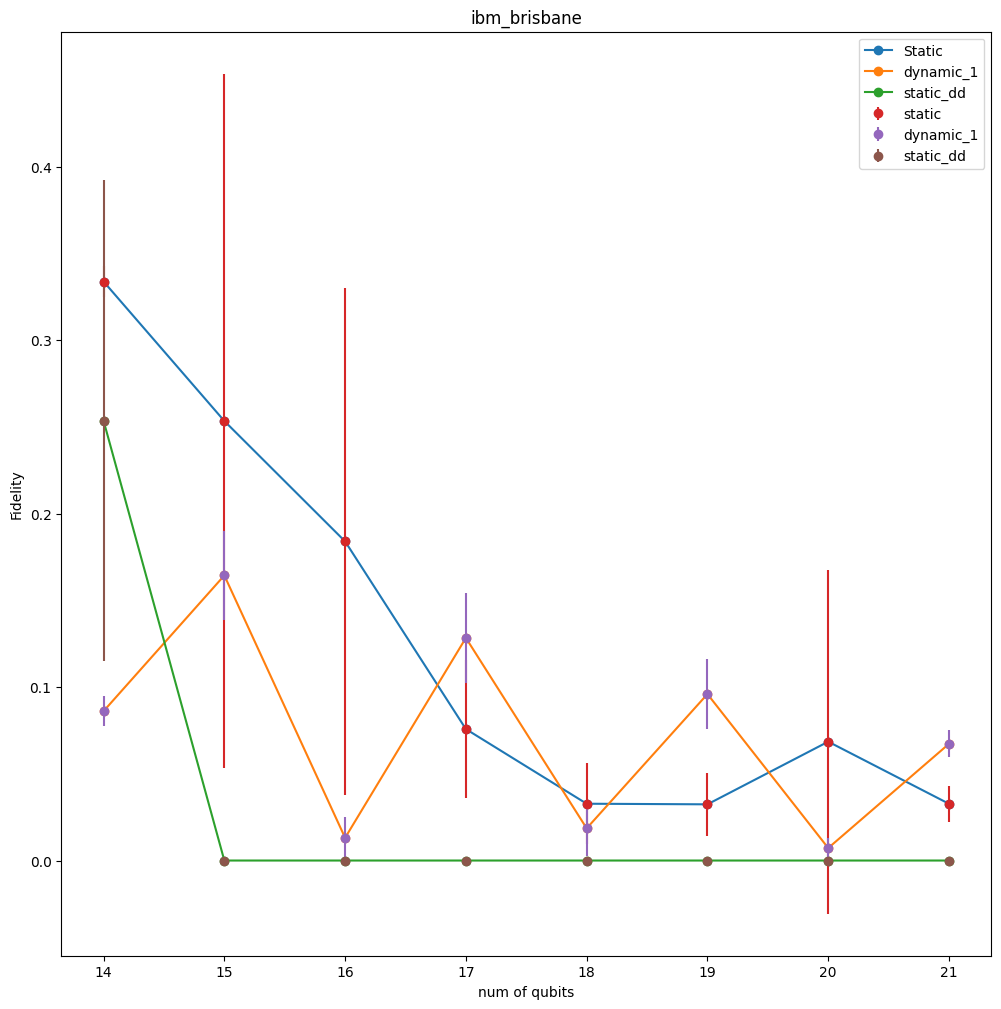

In [16]:
# Graph plotting
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
#figure(figsize=(16,12), dpi=180)
fig, ax1 = plt.subplots(1, 1, figsize=(12,12))

# Create  data.
ax1.set_xlabel('num of qubits')
ax1.set_ylabel('Fidelity')
ax1.set_title('ibm_brisbane')
x1 = num_qubit_list
y1_static = Fidelity_mean_static_brisbane
y1_dynamic_1 = Fidelity_mean_dynamic_1_brisbane
y1_static_dd = Fidelity_mean_static_dd_brisbane
print(y1_static)
print(y1_dynamic_1)
print(y1_static_dd)
y_error_static =Fidelity_std_static_brisbane
y_error_dynamic_1 =Fidelity_std_dynamic_1_brisbane
y_error_static_dd =Fidelity_std_static_dd_brisbane
ax1.plot(x1, y1_static, 'o-',label='Static')
ax1.plot(x1, y1_dynamic_1, 'o-',label='dynamic_1')
ax1.plot(x1, y1_static_dd, 'o-',label='static_dd')
ax1.errorbar(x1, y1_static,
			yerr = y_error_static, label='static',
			fmt ='o')
ax1.errorbar(x1, y1_dynamic_1,
			yerr = y_error_dynamic_1, label='dynamic_1',
			fmt ='o')
ax1.errorbar(x1, y1_static_dd,
			yerr = y_error_static_dd, label='static_dd',
			fmt ='o')


plt.legend()
plt.show()